### DACON(데이콘) 데이콘 Basic 자동차 가격 예측 AI 경진대회

##### EDA

In [22]:
import pandas as pd

train_df = pd.read_csv('data//train.csv')
train_df

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


In [23]:
test_df = pd.read_csv('data//test.csv')
test_df

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG)
0,TEST_00000,2017,2013,mazda,3,KAL,WIE,57000,1998,0,0,1,0,0
1,TEST_00001,2011,2008,ford,fiesta,ROP,POD,159000,1242,0,0,1,0,0
2,TEST_00002,2019,2017,volkswagen,polo,LOD,LOD,11284,999,0,0,1,0,0
3,TEST_00003,2021,2016,renault,megane,JAW,SLA,9,1332,0,0,1,0,0
4,TEST_00004,2010,2011,volvo,v60,WEJ,POM,270000,1999,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,TEST_14475,2012,2008,honda,jazz,PIA,MAZ,77405,1339,0,0,1,0,0
14476,TEST_14476,2011,2008,renault,kangoo,MJU,POM,228559,1461,0,1,0,0,0
14477,TEST_14477,2018,2012,toyota,auris,POO,DOL,17412,1798,0,0,0,1,0
14478,TEST_14478,2017,2008,renault,megane,WAR,MAZ,193000,1461,0,1,0,0,0


In [24]:
prd_year = train_df['생산년도'].value_counts()
rel_year = train_df['모델출시년도'].value_counts()
brand = train_df['브랜드'].value_counts()
car_model = train_df['차량모델명'].value_counts()

In [31]:
prd_year

생산년도
2009    4306
2017    4175
2008    4091
2010    3942
2011    3914
2018    3584
2012    3522
2016    3505
2007    3428
2014    3134
2013    3034
2015    2919
2006    2907
2005    2239
2019    1831
2004    1697
2021    1227
2003    1124
2002     798
2020     756
2001     514
2000     319
1999     264
2022     204
1998     177
1997      95
1996      62
1994      39
1995      39
1991      22
1993      17
1992      15
1990       7
1989       7
1988       2
1985       1
1983       1
1978       1
1987       1
Name: count, dtype: int64

In [25]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

##### 생산년도 value_counts

<Axes: ylabel='생산년도'>

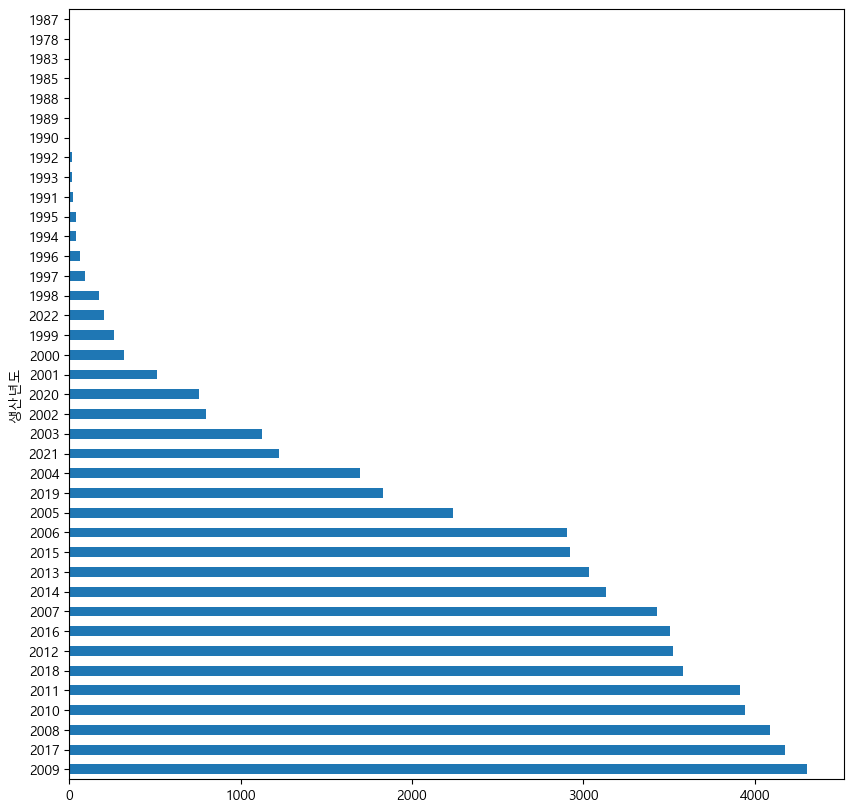

In [26]:
# import matplotlib.pyplot as plt

prd_year.plot(kind='barh',fontsize='10',figsize=(10,10))

##### 모델출시년도 value_counts

<Axes: ylabel='모델출시년도'>

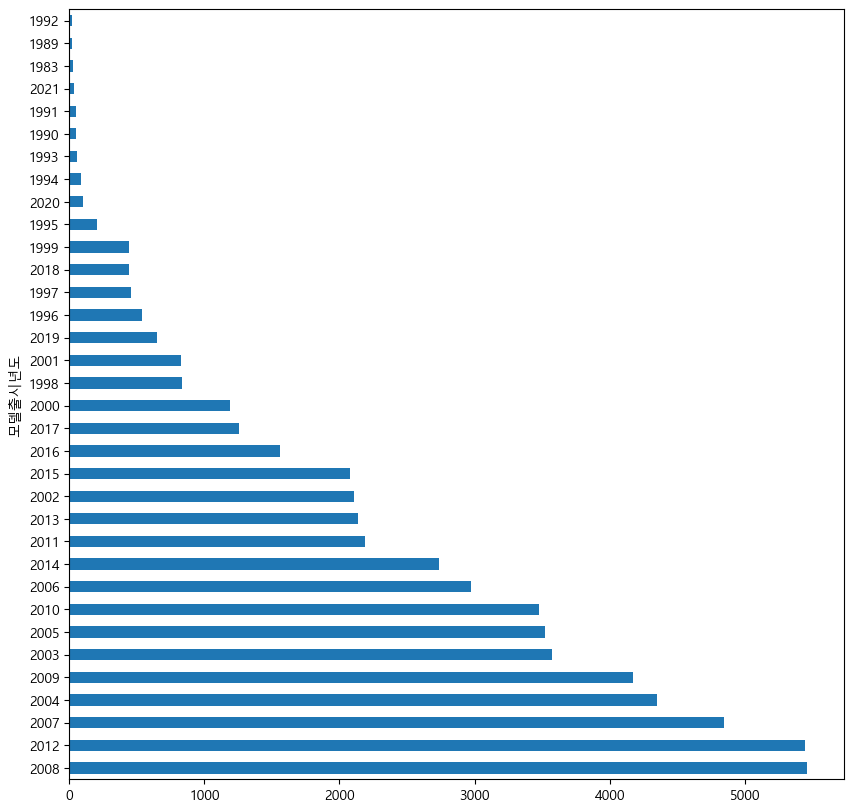

In [27]:
rel_year.plot(kind='barh',fontsize='10',figsize=(10,10))

##### 브랜드 value_counts

<Axes: ylabel='브랜드'>

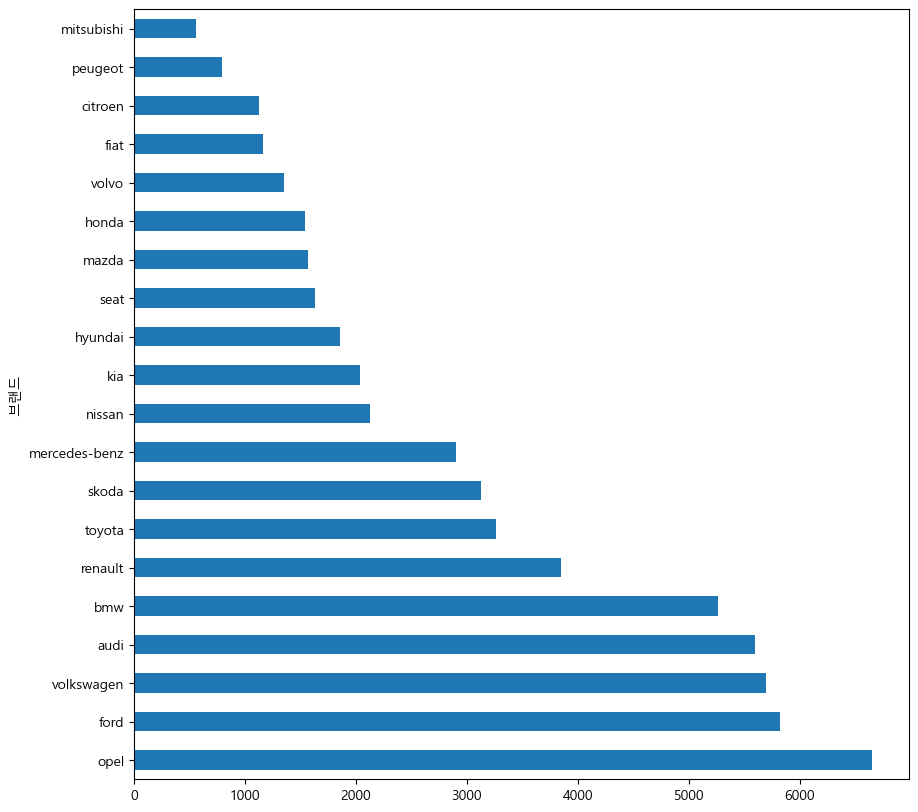

In [28]:
brand.plot(kind='barh',fontsize='10',figsize=(10,10))

##### 차량모델명 value_counts

<Axes: ylabel='차량모델명'>

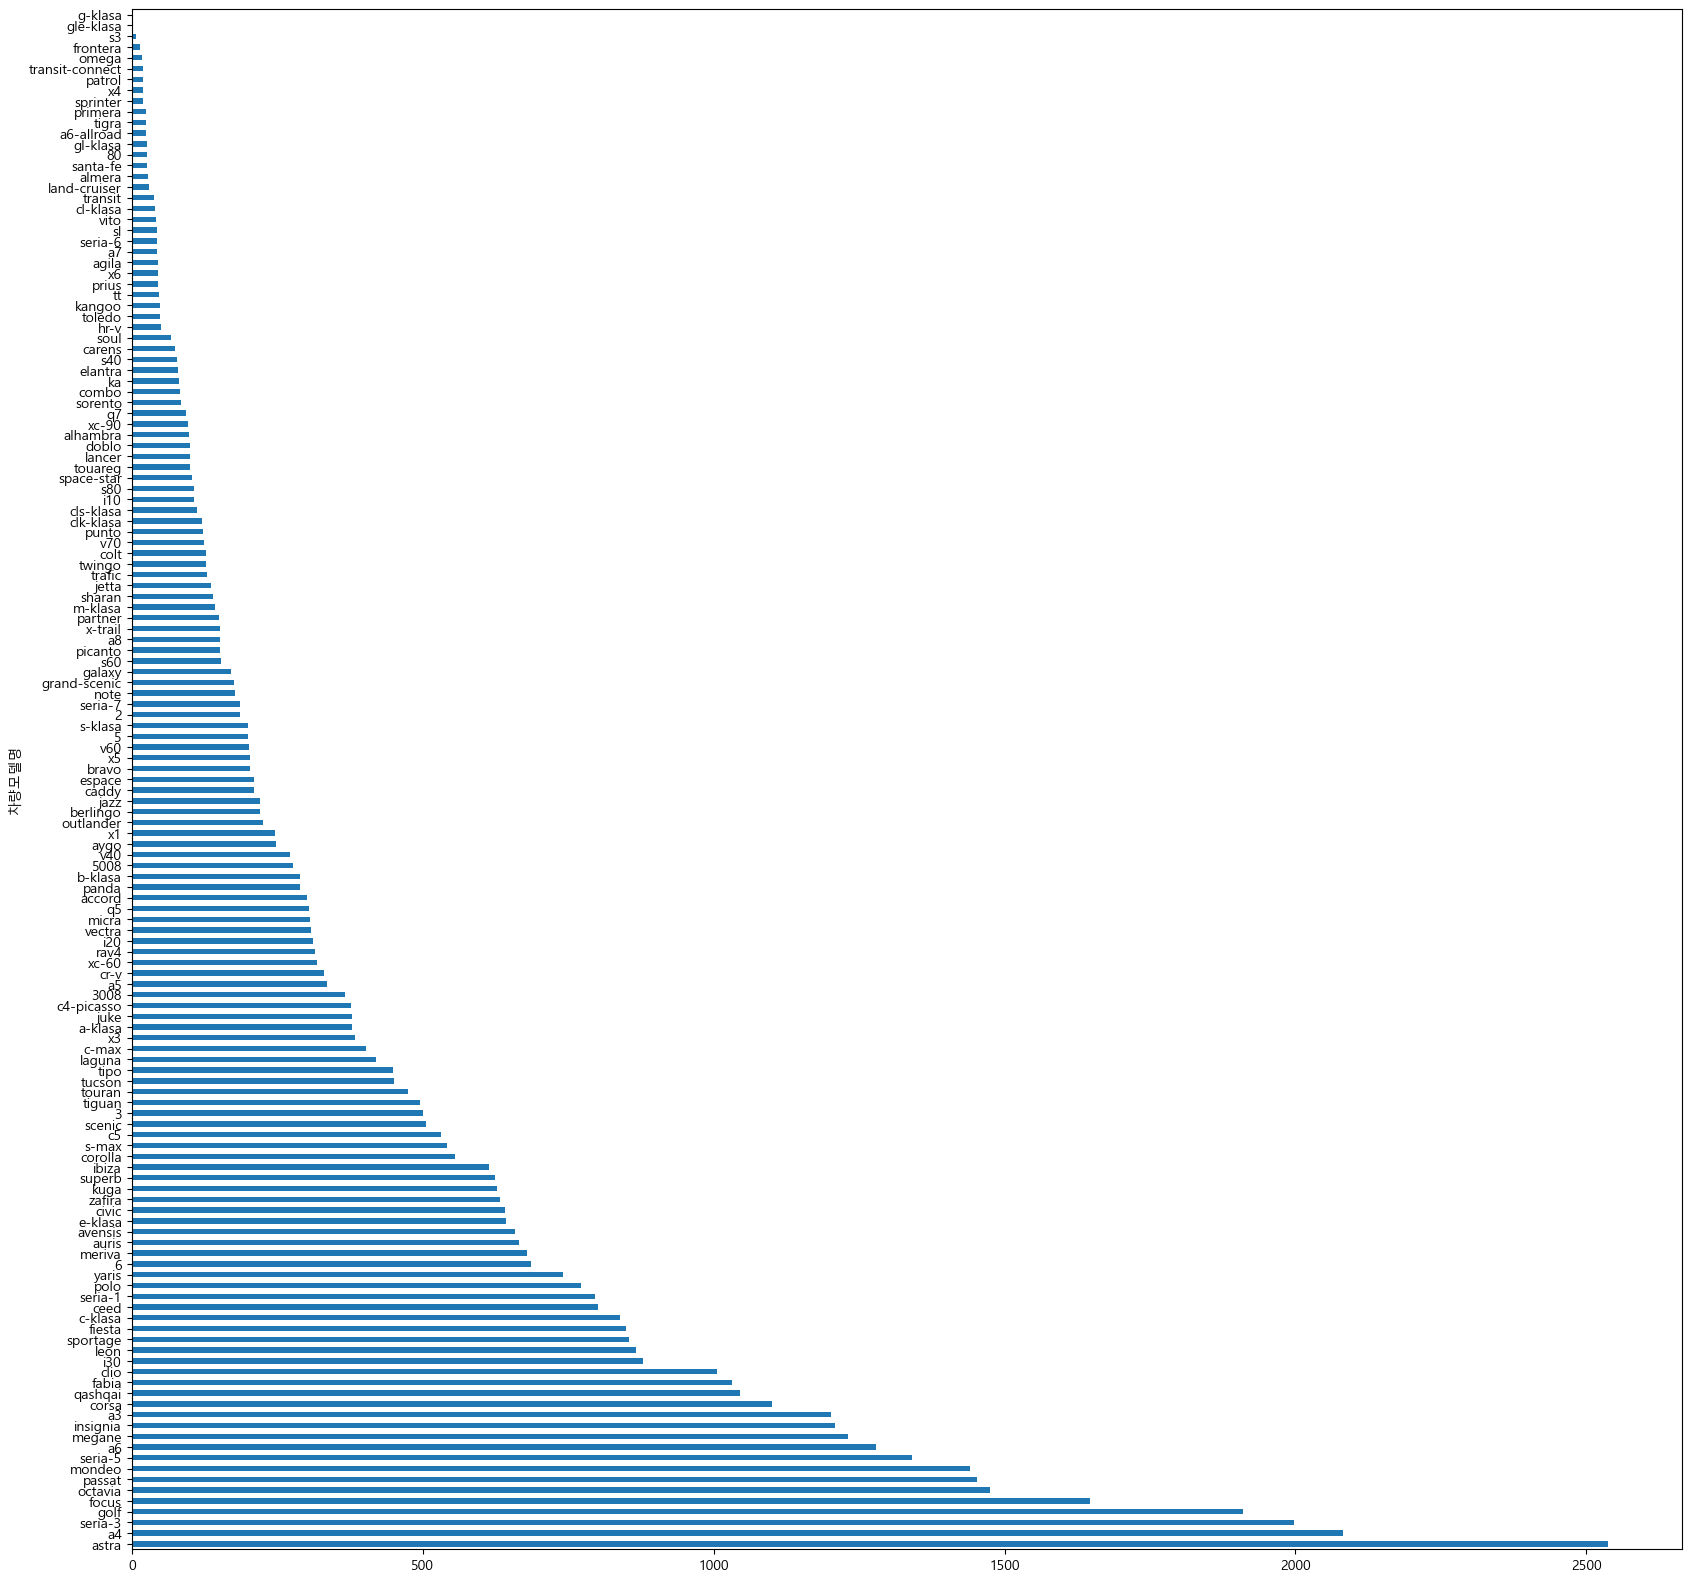

In [29]:
car_model.plot(kind='barh',fontsize='10',figsize=(20,20))

##### 가격별 countplot, histogram

<Axes: xlabel='가격', ylabel='count'>

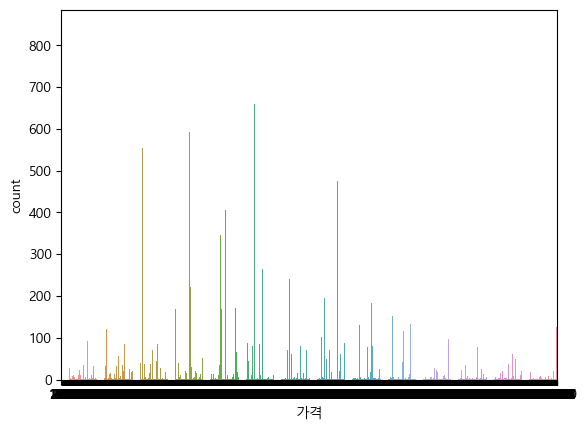

In [45]:
import seaborn as sns

sns.countplot(x=train_df['가격'])

<Axes: xlabel='로그_가격', ylabel='count'>

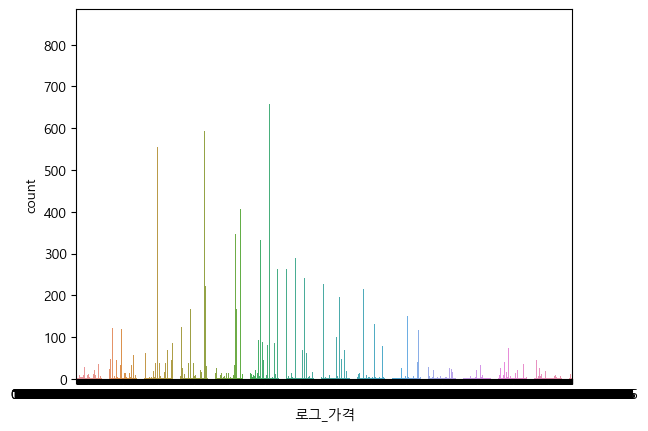

In [44]:
import seaborn as sns
import math
import numpy as np

train_df['로그_가격'] = np.log1p(train_df['가격'])

sns.countplot(x=train_df['로그_가격'])

<Axes: xlabel='가격', ylabel='Count'>

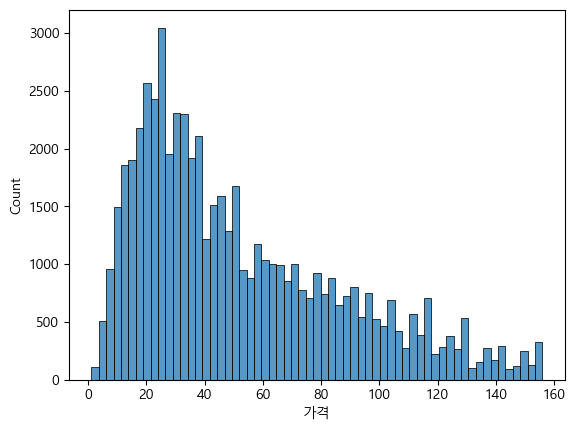

In [46]:
sns.histplot(x=train_df['가격'])

<Axes: xlabel='로그_가격', ylabel='Count'>

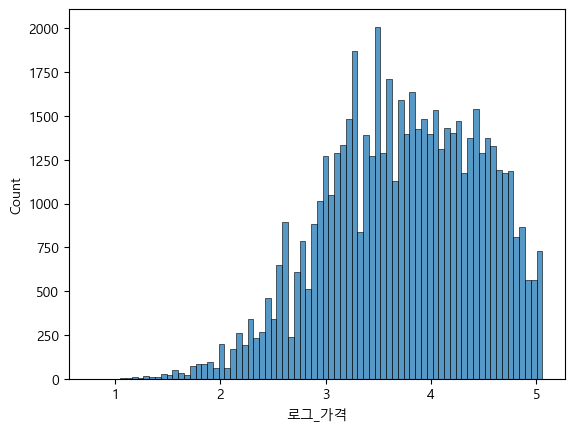

In [48]:
train_df['로그_가격'] = np.log1p(train_df['가격'])

sns.histplot(x=train_df['로그_가격'])

##### 브랜드별 가격 BoxPlot 

<Axes: xlabel='가격', ylabel='브랜드'>

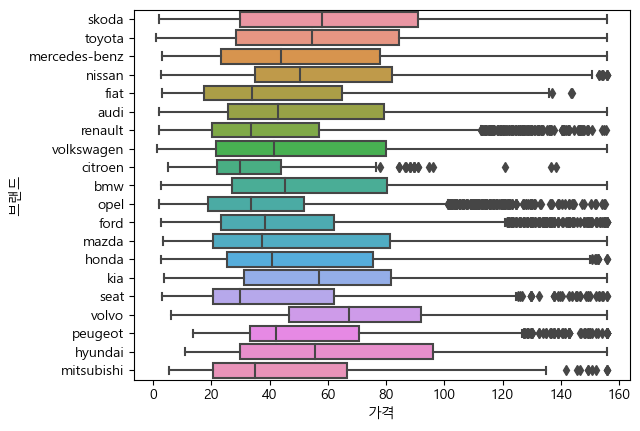

In [12]:
import seaborn as sns

sns.boxplot(x='가격',y='브랜드',data=train_df)